## <center>The Sparks Foundation</center>
## <center>Graduate Rotational Internship Program (June 2021)</center>
## <center><b>TASK - 2</b></center>
## <center><b>Prediction using Unsupervised Machine Learning</b></center>
### <center><b>Author: Vedant Deshmukh (Data Science and Business Analysis Intern)</b></center>


In this task, we have to predict the optimum number of clusters from the given ‘Iris’ dataset and also we need to represent it visually.

### What is Clustering ?

<p>Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups. In simple words, the aim is to segregate groups with similar traits and assign them into clusters.</p>

<p>Let’s understand this with an example. Suppose, you are the head of a rental store and wish to understand preferences of your costumers to scale up your business. Is it possible for you to look at details of each costumer and devise a unique business strategy for each one of them? Definitely not. But, what you can do is to cluster all of your costumers into say 10 groups based on their purchasing habits and use a separate strategy for costumers in each of these 10 groups. And this is what we call clustering.</p>

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

### Importing the Dataset

In [2]:
fileurl = "https://raw.githubusercontent.com/vedant27102001/TheSparksFoundation/main/Task_2%20dataset.csv"
data = pd.read_csv(fileurl)
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Here, we have 4 features named 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm' and 'PetalWidthCm' with one label.

### Determining the Size of the data

In [3]:
data.shape

(150, 6)

### Checking for Null Values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Thus, there are no null/missing values are present in the dataset.

### Summary Statistics
Here, we use the describe() to get the statistical summary of the data which includes min and max value, mean and standard deviation, quartiles and count for numerical data and unique value, top value and frequency of top value. 

In [5]:
data.describe(include = 'all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


 ### Analysing Unique Values in Species

Here, we hunt for the unique values with frequency in species.

In [6]:
data['Species'].value_counts().to_frame()

,Species
Iris-virginica,50
Iris-setosa,50
Iris-versicolor,50


We get to know that all the differenty types of species of iris have equal number of values i.e. 50 each. 

### Dropping those columns that are not Required

We drop some columns because they will not help us in any way in further processes and will not affect clusturing in any way.

In [7]:
df  = data.drop('Id', axis =  1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Data Visualization of Data 
Now, we visualize our data in which we use pairplot which plot the graphs for every possible pairs of features in the dataset.

Text(0.5, 1.02, 'Data Visualisation for Every Feature pair of the Dataset')

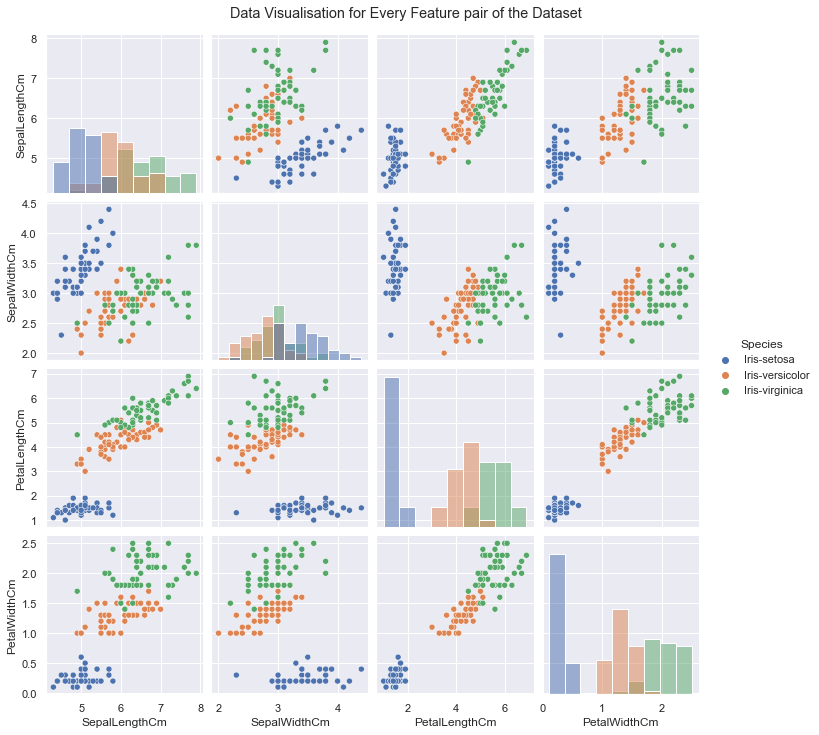

In [8]:
visual = sns.pairplot(df, hue = 'Species', diag_kind = 'hist')
visual.fig.suptitle("Data Visualisation for Every Feature pair of the Dataset", y = 1.02)

### Model Development 

<b>Importing KMeans class for Clustering from the Scikit-Learn Library</b>

In [9]:
from sklearn.cluster import KMeans

<b>Creating an Array for the Model to train and perform the Clustering</b>

In [10]:
X = df.iloc[:, [0,1,2,3]].values
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

<b>Finding the Optimum number of Clusters using Elbow method</b>

<p>In the Elbow method, we are actually varying the number of clusters ( K ) from 1 – 10. For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ). WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph starts to move almost parallel to the X-axis. The K value corresponding to this point is the optimal K value or an optimal number of clusters.</p>

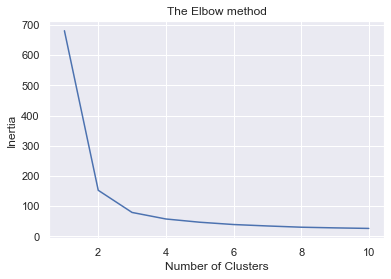

In [11]:
WCSS = []     # Within-Cluster Sum of Square

for i in range(1,11):
    cluster_model = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    cluster_model.fit(X)
    WCSS.append(cluster_model.inertia_)
    
plt.plot(range(1,11), WCSS)
plt.title("The Elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

<p>From above graph, we can see that from the point where K = 3 , the graph starts to move almost parallel to the X-axis.</p>
<p>So, the optimum number of clusters for the dataset is 3.</p>

### Clustering the Data with 3 clusters

In [12]:
cluster_model = KMeans(n_clusters = 3, init =  'k-means++', max_iter = 300,  n_init = 10, random_state = 0)
y_clusters = cluster_model.fit_predict(X)
y_clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

### Visualisation with Clusters

<b>Here, We representing the clusters based on the "Sepal Length" and "Sepal Width".</b>

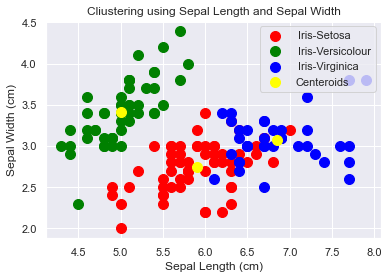

In [13]:
plt.scatter(X[y_clusters == 0, 0], X[y_clusters == 0,1], s = 100, c= 'Red', label = ' Iris-Setosa')
plt.scatter(X[y_clusters == 1, 0], X[y_clusters == 1,1], s = 100, c= 'Green', label = ' Iris-Versicolour')
plt.scatter(X[y_clusters == 2, 0], X[y_clusters == 2,1], s = 100, c= 'Blue', label = ' Iris-Virginica')
plt.scatter(cluster_model.cluster_centers_[:,0], cluster_model.cluster_centers_[:,1], s= 100, c ='Yellow', label = 'Centeroids')
plt.title("Cliustering using Sepal Length and Sepal Width")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend()
plt.show()

<b>Here, We representing the clusters based on the "Sepal Length" and "Sepal Width".</b>

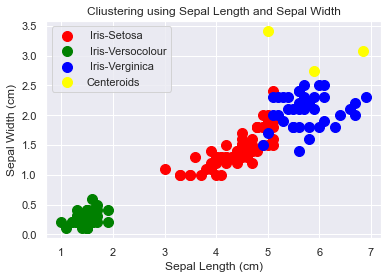

In [14]:
plt.scatter(X[y_clusters == 0, 2], X[y_clusters == 0,3], s = 100, c= 'Red', label = ' Iris-Setosa')
plt.scatter(X[y_clusters == 1, 2], X[y_clusters == 1,3], s = 100, c= 'Green', label = ' Iris-Versocolour')
plt.scatter(X[y_clusters == 2, 2], X[y_clusters == 2,3], s = 100, c= 'Blue', label = ' Iris-Verginica')
plt.scatter(cluster_model.cluster_centers_[:, 0], cluster_model.cluster_centers_[:, 1], s= 100, c ='Yellow', label = 'Centeroids')
plt.title("Cliustering using Sepal Length and Sepal Width")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend()
plt.show()